# McNemar test for GDF+PCA+GRU vs QUE+LOG

Null-Hypothesis: 
"Under the null hypothesis, the two algorithms should have the same error rate"

(Approximate Statistical Tests for Comparing Supervised Classification Learning Algorithm, 1998)


If $p$-value will be small we will reject that null hypothesis.


Beware - columns `TN	FN	FP	TP` are from contingency table, not from confusion table (so not for actual values). "Positives" in that case are the samples for which LSTM predicted 1.

In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM


from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


import warnings
import numpy as np
from collections import OrderedDict

import os

from lob_data_utils import lob, db_result, gdf_pca, model
from lob_data_utils.svm_calculation import lob_svm


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
data_dir = 'res_gdf_pca_gru_mcnemar'
if_should_savefig = False

In [3]:
df_res = pd.DataFrame()
for f in os.listdir(data_dir):
    if 'mcnemar' in f:
        df_res = df_res.append(pd.read_csv(os.path.join(data_dir, f)))
df_res.index = df_res['stock']
df_res.drop(columns='Unnamed: 0', inplace=True)
df_res

,pvalue,statistic,TN,FN,FP,TP,stock
stock,,,,,,,
3459,3.867716e-38,166.711470,1522,432,126,2719,3459
4851,1.287170e-12,50.348675,1482,454,263,2585,4851
10470,6.959255e-02,3.292605,1845,172,139,2643,10470
3879,2.241726e-07,26.812585,1786,295,436,2279,3879
4320,3.398064e-01,0.911162,1812,230,209,2533,4320
1431,1.547768e-03,10.020864,1709,377,294,2404,1431
9061,5.022610e-01,0.450156,1857,330,312,2297,9061
11583,4.849081e-01,0.487805,1988,97,108,2591,11583
9058,2.399666e-03,9.215561,1737,435,349,2271,9058


In [4]:
df_res[df_res['pvalue'] > 0.1]

,pvalue,statistic,TN,FN,FP,TP,stock
stock,,,,,,,
4320,0.339806,0.911162,1812,230,209,2533,4320
9061,0.502261,0.450156,1857,330,312,2297,9061
11583,0.484908,0.487805,1988,97,108,2591,11583
4799,0.120821,2.406646,1694,336,296,2466,4799
9062,0.344285,0.894410,2200,87,74,2431,9062


In [5]:
list(df_res[df_res['pvalue'] > 0.1].index)

[4320, 9061, 11583, 4799, 9062]

In [6]:
df_res[['pvalue', 'statistic']].describe()

,pvalue,statistic
count,1.500000e+01,15.000000
mean,1.276445e-01,39.345933
std,1.885680e-01,78.023643
min,6.029948e-62,0.450156
25%,1.182675e-07,1.658904
50%,1.577601e-02,5.827670
75%,2.303137e-01,29.620828
max,5.022610e-01,275.848455


In [7]:
print(df_res[['pvalue', 'statistic']].describe().to_latex())

\begin{tabular}{lrr}
\toprule
{} &        pvalue &   statistic \\
\midrule
count &  1.500000e+01 &   15.000000 \\
mean  &  1.276445e-01 &   39.345933 \\
std   &  1.885680e-01 &   78.023643 \\
min   &  6.029948e-62 &    0.450156 \\
25\%   &  1.182675e-07 &    1.658904 \\
50\%   &  1.577601e-02 &    5.827670 \\
75\%   &  2.303137e-01 &   29.620828 \\
max   &  5.022610e-01 &  275.848455 \\
\bottomrule
\end{tabular}



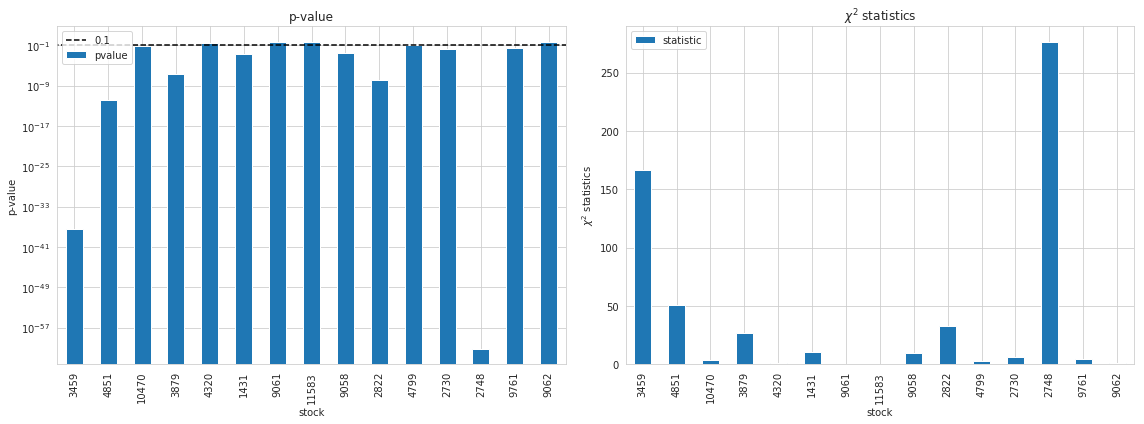

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_res[['pvalue']].plot(kind='bar', ax=ax1)
ax1.hlines(y=0.1, xmin=-10, xmax=100, linestyle='--', label='0.1')
ax1.set_title('p-value')
ax1.set_ylabel('p-value')
ax1.set_yscale('log')


ax1.legend()

df_res[['statistic']].plot(kind='bar', ax=ax2)
ax2.set_title('$\chi^2$ statistics')
ax2.set_ylabel('$\chi^2$ statistics')
ax2.legend()
plt.tight_layout()
if if_should_savefig:
    plt.savefig('gru_log_mcnemar.png')

## Conclusion

For 4 stocks the $p$-value is above treshold. For the rest of the stocks we can reject Null Hypothesis.